In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
def softmax(t):
    res = np.exp(t)
    return res / np.sum(res)

def relu(t):
    return np.maximum(t, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

def relu_deriv(t):
    return (t>=0).astype(float)


class Perceptron:
    def __init__(self, input_dim, h1_dim, h2_dim, out_dim, learn_rate = 0.05):
        self.input_dim = input_dim
        self.h1_dim = h1_dim
        self.h2_dim = h2_dim
        self.out_dim = out_dim
        self.learn_rate = learn_rate

        self.t1 = np.zeros([1, self.h1_dim])
        self.h1 = np.zeros([1, self.h1_dim])
        self.t2 = np.zeros([1, self.h2_dim])
        self.h2 = np.zeros([1, self.h2_dim])
        self.t3 = np.zeros([1, self.out_dim])
        self.out = np.zeros([1, self.out_dim])

        self.w1 = (np.random.rand(self.input_dim, self.h1_dim) - 0.5 ) * 0.01
        self.b1 = (np.random.rand(1, self.h1_dim) - 0.5) * 0.01
        self.w2 = (np.random.rand(self.h1_dim, self.h2_dim) - 0.5) * 0.01
        self.b2 = (np.random.rand(1, self.h2_dim) - 0.5) * 0.01
        self.w3 = (np.random.rand(self.h2_dim, self.out_dim) - 0.5) * 0.01
        self.b3 = (np.random.rand(1, self.out_dim) - 0.5) * 0.01
        self.drop_gradients()


    def drop_gradients(self):
        self.dE_dw1 = np.zeros((self.input_dim, self.h1_dim))
        self.dE_db1 = np.zeros((1, self.h1_dim))
        self.dE_dw2 = np.zeros((self.h1_dim, self.h2_dim))
        self.dE_db2 = np.zeros((1, self.h2_dim))
        self.dE_dw3 = np.zeros((self.h2_dim, self.out_dim))
        self.dE_db3 = np.zeros((1, self.out_dim))


    def run(self, data, activation_function):
        self.t1 = data @ self.w1 + self.b1
        self.h1 = activation_function(self.t1)
        self.t2 = self.h1 @ self.w2 + self.b2
        self.h2 = activation_function(self.t2)
        self.t3 = self.h2 @ self.w3 + self.b3
        self.out = self.t3
        return self.out



    def calculate_gradient(self, data, right_out, activation_deriv):
        dE_dt3 = self.out - right_out
        self.dE_dw3 += self.h2.T @ dE_dt3
        self.dE_db3 = dE_dt3

        dE_dh2 = dE_dt3 @ self.w3.T
        dE_dt2 = dE_dh2 * activation_deriv(self.t2)
        self.dE_dw2 += self.h1.T @ dE_dt2
        self.dE_db2 += dE_dt2

        dE_dh3 = dE_dt2 @ self.w2.T
        dE_dt3 = dE_dh3 * activation_deriv(self.t1)
        self.dE_dw1 += data.T * dE_dt3
        self.dE_db1 += dE_dt3


    def apply_gradient(self, batch_size=1):
        self.w1 -= self.learn_rate * self.dE_dw1 / batch_size
        self.w2 -= self.learn_rate * self.dE_dw2 / batch_size
        self.w3 -= self.learn_rate * self.dE_dw3 / batch_size
        self.b1 -= self.learn_rate * self.dE_db1 / batch_size
        self.b2 -= self.learn_rate * self.dE_db2 / batch_size
        self.b3 -= self.learn_rate * self.dE_db3 / batch_size

        self.drop_gradients()



In [75]:
def train_model(model, X_train, y_train, X_test, y_test):
    for epoch in range (1, 2000):
        loss = 0
        inner_counter = 1
        for i in np.random.permutation(len(X_train)):
            prediction = model.run(data=X_train[i].flatten(), activation_function=relu)
            loss += np.sum(np.square(y_train[i] - prediction[0][0])/2)
            model.calculate_gradient(data=X_train[i], right_out=y_train[i].flatten(), activation_deriv=relu_deriv)
            #if inner_counter % 50 == 0:
            model.apply_gradient(batch_size=1)
            #inner_counter += 1

        test_loss = 0
        # for i in range(0, 10000):
        #     prediction = np.argmax(model.run(data=X_test[i], activation_function=relu))
        #     test_loss += (y_test[i] - prediction) ** 2
        print(f"Epoch №{epoch} finished with accuracy {round(loss/len(X_train), 6)} Test dataset accuracy {round(test_loss/len(X_train) * 100, 2)}")


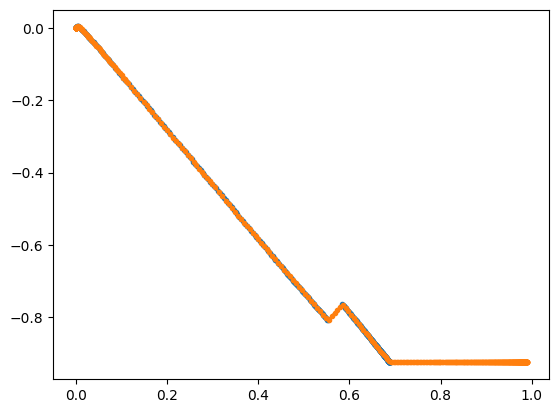

In [76]:
import pandas as pd
P_START = 21
dataframe_sorb = pd.read_excel('Silica-loc-isoth1.xlsx', header=None, sheet_name="Adsorption")
AX_train = []
PX_train = []
pore_N = dataframe_sorb.shape[1]  # P and A on input
# AX_train = np.array(dataframe_sorb.iloc[0][1:])
# ax_scale = np.max(AX_train)
# px_scale = np.max(PX_train)
# AX_train = AX_train / ax_scale
# PX_train = PX_train / px_scale
#
# X_train = np.empty(shape = (len(AX_train) * len(PX_train), 2))
# Y_train = np.empty(shape =len(AX_train) * len(PX_train))
# k = 0
# for i in range(0, len(AX_train)):
#     for j in range(0, len(PX_train)):
#         X_train[k] = np.array([AX_train[i], PX_train[j]])
#         Y_train[k] = dataframe_sorb[i+1][j+P_START]
#         k+=1
# y_scale = np.max(Y_train)
# Y_train = Y_train / y_scale
################################
# X_train = np.array(dataframe_sorb.iloc[0][1:])
#
# Y_train = np.empty((pore_N, len(dataframe_sorb.iloc[0][1:])))
# PX_train = np.empty((len(Y_train), len(PX_train)))
# PX_train_tmp = PX_train
# for i in range(1, pore_N-1):
#     Y_train[i] = np.array(dataframe_sorb[i+1][21:])
#     PX_train[i] = np.array(dataframe_sorb[0][21:])
# Y_train_tmp = Y_train
#
# for i in range(len(Y_train_tmp)):
#     PX_train[i] = -Y_train_tmp[i]*np.sin(-np.pi/4) + PX_train_tmp*np.cos(-np.pi/4)
#     Y_train[i] = PX_train_tmp*np.sin(-np.pi/4) + Y_train_tmp[i]*np.cos(-np.pi/4)
# plt.plot(PX_train[100], Y_train[100], marker=".")
################################
p_array = dataframe_sorb[0][21:]
a_array = np.array(dataframe_sorb.iloc[0][1:])

pi_x_array = np.empty((len(a_array), len(p_array)))
pi_a_array = np.empty((len(a_array), len(p_array)))
for i in range(len(a_array)):
    pi_x_array[i] = p_array
    pi_a_array[i] = dataframe_sorb[i+1][21:]


costheta = np.cos(2*np.pi-np.pi/4)
sintheta = np.sin(2*np.pi-np.pi/4)
for i in range(len(a_array)):
    pi_x_array_tmp = p_array
    pi_a_array_tmp = pi_a_array[i]
    pi_x_array[i] = pi_x_array_tmp*costheta - pi_a_array_tmp*sintheta
    pi_a_array[i] = pi_x_array_tmp*sintheta + pi_a_array_tmp*costheta


k = 80
x_scale = np.max(np.abs(pi_x_array))
y_scale = np.max(np.abs(pi_a_array))
pi_x_array = pi_x_array / x_scale
pi_a_array = pi_a_array / y_scale


pi_a_array_new = np.empty((len(a_array), len(p_array)))
for i in range(len(pi_a_array)):
    pi_a_array_new[i] = np.interp(p_array, pi_x_array[i], pi_a_array[i])

plt.plot(pi_x_array[k], pi_a_array[k], marker=".")
plt.plot(p_array, pi_a_array_new[k], marker=".")

In [77]:
# X_train = np.linspace(-10, 10, 100)
# Y_train = np.square(X_train)*2 + np.power(X_train, 3)*0.5 + np.sin(X_train)*0.2 + np.cos(X_train*10)*100
# x_scale = np.max(X_train)
# y_scale = np.max(Y_train)
# X_train = X_train / x_scale
# Y_train = Y_train / y_scale

In [81]:
np.random.seed(0)
model = Perceptron(input_dim=1, h1_dim=1000, h2_dim=1000, out_dim=len(pi_a_array_new[0]))

In [ ]:
model.learn_rate = 0.07
train_model(model, a_array, pi_a_array_new, a_array, pi_a_array_new)

Epoch №1 finished with accuracy 131.121686 Test dataset accuracy 0.0
Epoch №2 finished with accuracy 131.119404 Test dataset accuracy 0.0
Epoch №3 finished with accuracy 131.135766 Test dataset accuracy 0.0


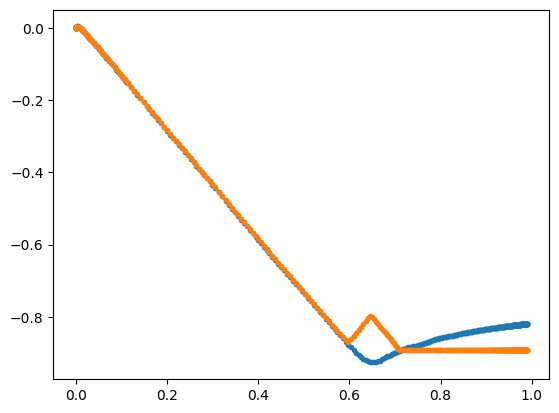

In [88]:
i = -50
answer = model.run(data=a_array[i].flatten(), activation_function=relu)
plt.plot(p_array, answer.reshape(458,1), marker=".")
plt.plot(p_array, pi_a_array_new[i], marker=".")

In [ ]:
# right_answer = []
# for i in X_train:
#     right_answer.append(model.run(data=i.flatten(), activation_function=relu)[0][0]*y_scale)
# plt.plot(X_train*10, Y_train*y_scale, marker=".")
# plt.plot(X_train*10, right_answer, marker=".")

In [ ]:
# import PyQt5
# %matplotlib notebook
#
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import axes3d
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# X, Y = np.meshgrid(AX_train, PX_train)
# Z = Y_train.reshape(X.shape)
# surf = ax.plot_surface(X, Y, Z)
# plt.show()